<a id='top'></a>

# CSCI3022 F21
# Homework 4: Bayes and Discrete RVs
***

**Name**: ________________________________________________________________________

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 27 Sep**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

[Back to top](#top)
<a/ id='p1'></a>

## (15 pts) Problem 1: Bayes and Additional Information



In or marbles-in-bags examples in class and in notebook 5, we asked a question about drawing marbles from bags with uneven distributions of marbles inside.  The question we often want to ask is "how can we figure out which bag we had when all we observe is the marbles drawn?"

Our Pokédex is pretty great since we've collected lots of Pokémon. Enough that when we battle our friends, we don't even bother to think about what we choose.  Instead, we:

1) Pick a **generation** of Pokémon at random, with all 4 outcomes equally likely

2) Choose any one of our Pokémon of that generation to battle (each equally likely among the total options)

3) If we battle again, we again choose one of our available Pokémon of the *same* generation chosen in step 1), possibly even the same Pokémon in step 2).

Inside our Pokédex is the following:

- From generation 1, 9 total: 3 Water types, 3 Poison types (Koffings, of course), 2 Fire types, 1 Electric Type
- From generation 2, 14 total: 9 Water types (all Mudkips), 3 Fire types, 1 Electric Types, 1 Dragon Type
- From generation 3, 7 total: 1 Grass type, 2 Fire types, 1 Electric Type, 3 Dragon types
- From generation 4, 6 total: 2 Water types, 2 Fire Types, 2 Electric Types


**Part A**:

Suppose we battle a single friend once.  What is the exact probability that we use a Water Type, $P(W_1)$?

**Part B**:

Suppose we battle a single friend once, and we used a Water Type.  Given this, what is the exact probability that we were using a generation 2 Pokémon, or $P(2| W_1)$?

**Part C**:

Are the events $2$ for "used a second generation Pokémon" and $W_1$ for "used a Water Pokémon in our first battle" independent?  Why or why not.




**Part D**:

Suppose we decide to battle 3 times in a row against the same opponent and we end up with a Water Type all 3 times.  What is the probability that all 3 Pokémon are Water Type?  **Given** that all 3 Pokémon were Water Type, which generation do you think you selected at random?  Justify with an exact probability of *each* generation.


**Part E**:  

First, work out **by hand** a formula for the probability in general that you currently are using generation 2 Pokémon, given that you used a Water Type for $n$ battles in a row.

Then, define a function `prob_gen2` to calculate $P(2 \mid (W_1\cap W_2 \cap \dots \cap W_n))$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.  Then create a line plot where the $x$ axis is $n$ (from 0 to 20) and the y-axis is $P(2|\text{"used a water type n times in a row"})$

[Back to top](#top)
<a/ id='p2'></a>

## (15 pts) Problem 2 (Theory): Making a pdf
***


Suppose we devise the following die-rolling game.

1) Roll a fair 6-sided die, and record the face `x` as your score.

2) Then roll `x` more fair 6-sided dice, and add their faces to your original score `x`.

Denote your final score by the random variable $Y$, and the pdf of $Y$ by $f(y)$.

**Part A**: Compute by hand the *exact* probability that $Y=5$, or $f(5)$.

We have a 1/6 chance of each original side, 6,5,4,3 have no possible combinations of further rolls adding to 5. 2 has 2 possible combinations of rolls totalling to 5: (2,1,2) and (2,2,1). 1 has one combination: (1,4). This gives us the total probability that $f(5) = 2(\frac{1}{6}^3) + \frac{1}{6}^2 = .03703$

**Part B**: Use a simulation to generate the approximate pdf $f(y)$ over all possible outcomes.  Display that pdf as a histogram. Print the approximated value of $f(5)$ to check your work in **A**

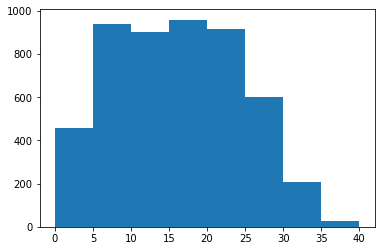

F(5) = 0.0328


In [2]:
def dieSimulation():
    die = [1,2,3,4,5,6]
    choice= score = np.random.choice(die)
    for i in range(choice):
        score+=np.random.choice(die)
    return(score)

n=5000
sumation = 0
temp = 0
rolls= []
for i in range(n):
    temp = dieSimulation()
    rolls.append(temp)
    if(temp==5): sumation +=1 
bins = [0,5,10,15,20,25,30,35,40]
plt.hist(rolls, bins = bins)
plt.xticks = bins
plt.show()
print("F(5) = {}".format(sumation/n))

**Part C**: Use your simulations in part B to generate the approximate cdf $F(y)$ over all possible outcomes.  Display that cdf as a line plot (e.g. via `plt.plot`).

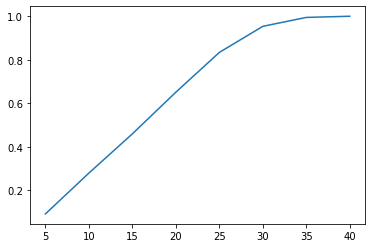

In [3]:
count, bins_count = np.histogram(rolls, bins=bins)
plt.plot(bins_count[1:], np.cumsum(count/sum(count)))

[Back to top](#top)
<a/ id='p3'></a>

## (15 pts) How's the weather?
***
Suppose that we're interested in exploring how patterns in weather express themselves.  The file `boulderjuly90s.txt` imported below has the *counts* of days above 90 degrees from July 1949-2021.  See [here](https://psl.noaa.gov/boulder/) for source.

In [4]:
days=pd.read_csv('./data/boulderjuly90s.csv')
days.head()

,Year,JUL
0,1949,15
1,1950,7
2,1951,21
3,1952,19
4,1953,14


**Part A**:

Perform the usual initial explorations of data.  Ensure that there are no missing or fill values, check the size/shape of the data frame, and generate a line plot with the $x$ axis as year and the $y$ axis as days above 90 in that year's July.

Do there appear to be any patterns in the number of days over time?

    Year  JUL
0   1949   15
1   1950    7
2   1951   21
3   1952   19
4   1953   14
..   ...  ...
68  2017   16
69  2018   15
70  2019   14
71  2020   22
72  2021   15

[73 rows x 2 columns]
0


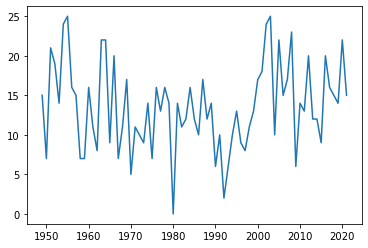

There doesn't seem to be any patterns in the data 


In [5]:
print(days)
print(days['JUL'].isnull().sum())
plt.plot(days['Year'],days['JUL'])
plt.show()
print("There doesn't seem to be any patterns in the data ")

**Part B**:

Compute the average number of days in a July that are over 90, then divide by 31 to get the overall *probability* that any given day in July is over 90.  Suppose this is the "true" value $p$ of an underlying *Bernoulli* random variable.

If the days of any given July are actually **independent**, then each July should be 31 independent such Bernoulli random variables.  Using the relevant `scipy.stats` functions, answer the following:

"If each day is independent of one another and probability $p$ of being above 90 degrees, what is the probability that 20 or more days in July are above 90 degrees?"

Compare your theoretical result to the number of July's that actually had 20 or more days above 90 from `days`.

In [6]:
avgDays = (days['JUL'].sum()/days.shape[0]) 
probOf90 = avgDays/31
print("The average number of days over 90 in July for the data frame is: {}".format(avgDays))
print("The probability that there are 20 or more days over 90 in a month of July is: {}".format(stats.binom.pmf(20,31,probOf90)))
print("The number of oberserved Julys with 20 or more days over 90 is: {count}, which is way higher than the number that is predicted: {theoretical}".format(count = (days['JUL']>20).sum(),theoretical = days.shape[0]*stats.binom.pmf(20,31,probOf90)))

The average number of days over 90 in July for the data frame is: 13.602739726027398
The probability that there are 20 or more days over 90 in a month of July is: 0.01031207734313603
The number of oberserved Julys with 20 or more days over 90 is: 10, which is way higher than the number that is predicted: 0.7527816460489302


**Part C**:

Create a two part plot for the counts of the days-in-July-over-90.  The first is the histograms of the true values in `days`, the second is the theoretical value from the pmf of the underlying process if each day within the months was independent and identically distributed.  Overlay the pmf as a line on top of the histogram.  Do they visually appear to be coming from the same distribution?

In [29]:
coin = ['H','T']
def simJul():
    count = 0
    for i in range (31):
        count+=np.random.choice([1,0], p = [probOf90, 1-probOf90])
    return count  
n=5000
allTheJuls = []
for i in range (n):
    allTheJuls.append(simJul())
count, bins_count = np.histogram(allTheJuls,bins = np.arange(0,31))


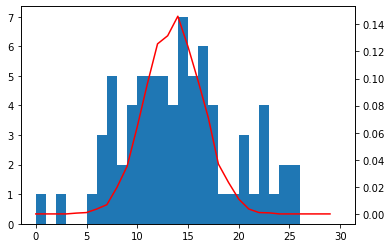

In [32]:
fig, ax = plt.subplots()
axes = [ax, ax.twinx()]
axes[0].hist(days['JUL'], bins = np.arange(0,31) )
axes[1].plot(count/count.sum(),color = 'Red')
plt.show()

**Part D**:

Draw a conclusion.  What possible causes could you find for your results in **C** for the similarities and/or differences between the two distributions?

The real probability of days over 90 could be shifting so quickly from year to year that doing an average over a range of 73 years isn't accurate enough of a data model. The two plots have similar shapes however there are some very large discrepencies on either side. The pmf reports less than a .01 probability of Julys with 0-5 and 20-30 days over 90 yeat there are 2 julys with 0-5 days over 90 and 13 julys with 20-30 days over 90. 